   # <center>Are the Lakers still as good as your dad says they are?<center>
 
   


## <center>A Sentiment Analysis of NBA teams<center>

#### <center>By Chris Tordi, Aidan White, and Sam Nozaki<center>

## Data Collection

In [4]:
import requests as rq
import sys
import string
from bs4 import BeautifulSoup
import re

#The following code was used to scrape the history sections of each NBA team
def get_history_text(team):
    out = ''
    url = "https://en.wikipedia.org/wiki/{0}".format(team)
    html = rq.get(url).text
    soup = BeautifulSoup(html)
    history = soup.find_all('div', attrs={'id': 'mw-content-text'})
    p = history[0].find_all('p')
    for i in p:
        i = str(i)
        i = re.sub('<.*?>', '', i)
        i = re.sub('\[\d.*?\]', '', i)
        out += ' ' + i
    return out

def main():
    with open('./teams.txt', 'r') as f:
        teams = f.read()
    teams = teams.split('\n')

    for team in teams:
        h = get_history_text(team)
        with open('./history/{0}.txt'.format(team), 'w') as f:
            f.write(h)
main()


/Users/aidanwhite/anaconda/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/aidanwhite/anaconda/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [2]:
#The following code was used to gather Tweets from each NBA team over the course of a week

In [ ]:
import tweepy

def get_tweets():
    consumer_key = 'dv6NWGg4QT8rr979x81KLIsyI'
    consumer_secret = 'nRVr5D48SWJhl491PRjMVCxpCUpnUdMPpbgWsDr920Dm6111vc'
    access_token = '4855652441-2Ku9RhnqT24ZyjvtyiqrLWUVqbbjNZILhcynw9u'
    access_token_secret = 'br2CEMNroCFKYPK8mckafFqhAiRXg6TwW2EhmZZC0riYT'

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth)

    team_tweets = {'@Raptors':[], '@warriors':[], '@nuggets':[],
                   '@okcthunder':[], '@PelicansNBA':[], '@dallasmavs':[],
                   '@hornets':[], '@Lakers':[], '@nyknicks':[],
                   '@Timberwolves':[], '@LAClippers':[], '@OrlandoMagic':[],
                   '@Pacers':[], '@cavs':[], '@HoustonRockets':[],
                   '@BrooklynNets':[], '@Suns':[], '@spurs':[], '@utahjazz':[],
                   '@celtics':[], '@ATLHawks':[], '@DetroitPistons':[],
                   '@chicagobulls':[], '@sixers':[], '@Bucks':[],
                   '@WashWizards':[], '@MiamiHEAT':[], '@memgrizz':[],
                   '@trailblazers':[], '@SacramentoKings':[]}

    for team in team_tweets.keys():
        f = open('./Tweets/' + team + '.txt', 'a')

        for tweet in tweepy.Cursor(api.search, q=team, lang='en', count=100).items(300):
            if not tweet.text[:2] == 'RT':
                f.write(tweet.text.encode('utf-8') + '\n')

        f.close()

In [6]:
# The following code was used to hit IMB's ToneAnalyzer API to perform sentiment analysis
import json
from os.path import join, dirname
from watson_developer_cloud import ToneAnalyzerV3



tone_analyzer = ToneAnalyzerV3(
	  username='223089c9-beb4-4352-baae-02baf0d63031',
	  password='bAejcajOIsrR',
	  version='2017-09-26'
	)

twitter_data = []


def toneAnalyzer(text, team):
	tone = tone_analyzer.tone(text, tones='emotion',
    content_type='text/plain')
  	prettyTone = json.dumps(tone, indent=2)
  	toneList = tone['document_tone']['tones']
  	tonesToAdd = {}


	for tone in toneList:
		tonesToAdd[tone['tone_name']] = tone['score']

	tweet_dict = {'Team': team, 'Tweet': text, 'Sentiment': tonesToAdd}
	twitter_data.append(tweet_dict)

	return tweet_dict

In [3]:
#The following code was used to gather Sentiment Data for Tweets

In [ ]:
from IBManalysis import toneAnalyzer
import os
import json

tweet_data = []

#Function calls IBM's Sentiment Analysis API and returns a list of Sentiment Scores
# EX: Joy: .75, Anger: .8, Sadness: .2, Confidant: .5 ... 
def getSentiment():
    count = 0
    with open('./Tweets/@WashWizards.txt', 'r') as f:
        content = f.readlines();
        for line in content:
            print(line)
            try:
                tweet_info = toneAnalyzer(line, "@WashWizards")
            except:
                pass

            if (tweet_info['Sentiment']):
                count += 1
                #print tweet_info
                tweet_data.append(tweet_info)
    print(count)
    appendJSON(tweet_data)

#writes data to json file
def writeJSON(tweet_data):
    with open('./sentiment_data/tweet_data.json', 'w') as f:
        json.dump(tweet_data, f)

#adds new tweet data to existing tweet data currently in json file
def appendJSON(tweet_data):
    with open('./sentiment_data/tweet_data.json', 'r') as f:
        data = json.load(f)

    for tweet in tweet_data:
        data.append(tweet)

    writeJSON(data)

## Sentiment Analysis

In [14]:
#The following code was used to find sentiment scores for Tweets and store those scores in a datastructure in a
# JSON file

In [9]:
#The following code was used to find sentiment analysis scores for wikipedia articles and write them to a JSON file.
import os
import json

team_data = {}
out = []

for name in os.listdir('./history/'):
    sad = 0
    joy = 0
    with open('./history/' + name, 'r') as f:
        hist = f.read()
    # Perform sentiment analysis on fractions of the history text
    # and sum the values for each team, for more accuracy than the whole text
    frac = 6
    for i in range(frac):
        start = int((i / float(frac)) * len(hist))
        end = int((i + 1) / float(frac) * len(hist))
        try:
            tones = toneAnalyzer(hist[start:end], name)
        except:
            continue
        if 'Joy' in tones['Sentiment'].keys():
            joy += tones['Sentiment']['Joy']
        if 'Sadness' in tones['Sentiment'].keys():
            sad += tones['Sentiment']['Sadness']
    team_data = {}
    team_data['team'] = name
    team_data['joy'] = round(joy, 3)
    team_data['sadness'] = round(sad, 3)
    out.append(team_data)

with open('./sentiment_data/history_sentiments.json', 'w') as f:
    json.dump(out, f, indent=4, sort_keys=True)

## NBA Historical Wikipedia Data Conclusions

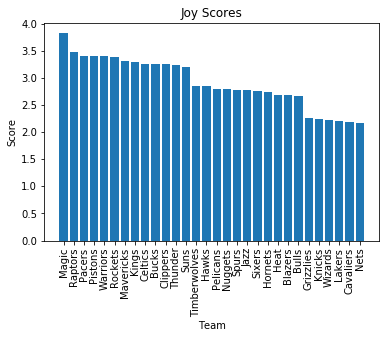

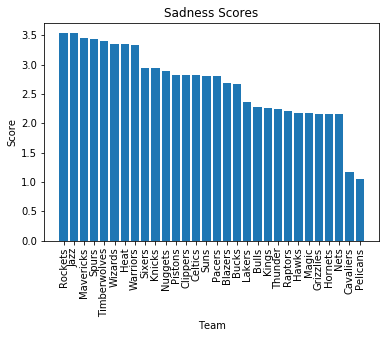

In [11]:
# Below is code used to plot the sentiment analysis scores for the Wikipedia articles
from matplotlib import pyplot as plt
import json
import collections

def load_sentiment_scores():
    with open('./sentiment_data/history_sentiments.json', 'r') as f:
        string = f.read()
    sentiment_data = json.loads(string)
    return sentiment_data

def filename_to_name(filename):
    filename = filename.replace('.txt', '')
    filename = filename.replace('_', ' ')
    l = filename.split(' ')
    return l[-1]


def PlotHistoryScore(sentiment):
    data = load_sentiment_scores()
    pairs = []
    for team in data:
        pairs.append((float(team[sentiment]), filename_to_name(team['team'])))
    pairs.sort(reverse = True)
    teams = [team[1]for team in pairs]
    scores = [team[0] for team in pairs]
    xs = [i + 0.1 for i, _ in enumerate(teams)]
    plt.bar(xs, scores, .8)
    plt.xticks([i + .1 for i, _ in enumerate(teams)], teams, rotation='vertical')
    axes = plt.gca()
    plt.title(sentiment.capitalize() + " Scores")
    plt.xlabel('Team')
    plt.ylabel('Score')
    plt.show()

def main():
    PlotHistoryScore('joy')
    PlotHistoryScore('sadness')

main()

In [12]:
# The following code was used to scrape the historical records of the NBA teams, calculate a winning percentage 
# and write those win %'s to a JSON file.

import requests as rq
import json
from bs4 import BeautifulSoup

teams = ['ATL', 'BOS', 'NJN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU',
'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOH', 'NYK', 'OKC', 'ORL', 'PHI',
'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']

def get_html(team):
    url = "https://www.basketball-reference.com/teams/{0}/stats_basic_totals.html".format(
        team)
    d = rq.get(url).text
    return d

def get_winning_pct(html, team):
    wins = 0
    losses = 0
    soup = BeautifulSoup(html)
    rows = soup.find_all('tr')
    for row in rows:
        try:
            wins += int(row.find('td', attrs={'data-stat':'wins'}).text)
            losses += int(row.find('td', attrs={'data-stat':'losses'}).text)
        except:
            continue
    print team
    return (float(wins)/ (wins + losses))


def main():
    winning_pct_data = {}
    data = []
    for team in teams:
        html = get_html(team)
        team_pct = get_winning_pct(html, team)
        winning_pct_data[team_pct] = team

    with open('./sentiment_data/winning_pcts.json', 'w') as f:
        json.dump(winning_pct_data, f, indent=4, sort_keys=True)
main()

ATL
BOS
NJN
CHA
CHI
CLE
DAL
DEN
DET
GSW
HOU
IND
LAC
LAL
MEM
MIA
MIL
MIN
NOH
NYK
OKC
ORL
PHI
PHO
POR
SAC
SAS
TOR
UTA
WAS


## NBA Current Tweet Data Conclusions

In [1]:
# The following blocks contain the code used to order the NBA teams based on the joy, sadness, and anger of their tweets.

In [3]:
import json

# parse through JSON to get average sentiment data
def average_sentiment(team, sentiment):
    with open('./sentiment_data/tweet_data.json', 'r') as f:
        data = json.load(f)

    sentiment_sum = 0
    tweet_count = 0
    for tweet in data:
        if (tweet['Team'] == team):
            tweet_count += 1
            if (tweet['Sentiment'].has_key(sentiment)):
                sentiment_sum += tweet['Sentiment'][sentiment]

    return 1.0 * sentiment_sum / tweet_count

In [ ]:
teams = {'@Raptors':{}, '@warriors':{}, '@nuggets':{}, '@okcthunder':{},
         '@PelicansNBA':{}, '@dallasmavs':{}, '@hornets':{}, '@Lakers':{},
         '@nyknicks':{}, '@Timberwolves':{}, '@LaClippers':{},
         '@OrlandoMagic':{}, '@Pacers':{}, '@cavs':{}, '@HoustonRockets':{},
         '@BrooklynNets':{}, '@Suns':{}, '@spurs':{}, '@utahjazz':{},
         '@celtics':{}, '@ATLHawks':{}, '@DetroitPistons':{},
         '@chicagobulls':{}, '@sixers':{}, '@Bucks':{}, '@WashWizards':{},
         '@MiamiHEAT':{}, '@memgrizz':{}, '@trailblazers':{},
         '@SacramentoKings':{}}

joy_dict = {}
sadness_dict = {}
anger_dict = {}

# populate dicts with sentiment values
for team in teams.keys():
    joy_dict[team] = average_sentiment(team, 'Joy')
    sadness_dict[team] = average_sentiment(team, 'Sadness')
    anger_dict[team] = average_sentiment(team, 'Anger')

# sort dicts by value
joy_ranking = sorted(joy_dict.items(), key=lambda x:x[1], reverse=True)
sadness_ranking = sorted(sadness_dict.items(), key=lambda x:x[1], reverse=True)
anger_ranking = sorted(anger_dict.items(), key=lambda x:x[1], reverse=True)

# display results
print "Teams ranked by tweet joy:"
for team in joy_ranking:
    print str(team[0]) + ' ' + str(team[1])
print

print "Teams ranked by tweet sadness:"
for team in sadness_ranking:
    print str(team[0]) + ' ' + str(team[1])
print

print "Teams ranked by tweet anger:"
for team in anger_ranking:
    print str(team[0]) + ' ' + str(team[1])


## Can Tweet sentiments predict NBA standings

In [6]:
#The following is a set of ordered NBA rankings

In [10]:
NBA_Rankings = ['@celtics', '@HoustonRockets', '@warriors', '@cavs', '@Raptors', '@spurs', '@DetroitPistons',
                  '@nuggets', '@sixers', '@Timberwolves', '@Bucks', '@trailblazers', '@WashWizards', '@Pacers',
                  '@utahjazz', '@PelicansNBA', '@nyknicks', '@okcthunder', '@MiamiHEAT', '@hornets',
                  '@OrlandoMagic', '@BrooklynNets', '@LaClippers', '@Lakers', '@memgrizz', '@dallasmavs', '@Suns', '@SacramentoKings',
                  '@ATLHawks', '@chicagobulls']

NBA_TopHalf = ['@celtics', '@HoustonRockets', '@warriors', '@cavs', '@Raptors', '@spurs', '@DetroitPistons',
                  '@nuggets', '@sixers', '@Timberwolves', '@Bucks', '@trailblazers', '@WashWizards', '@Pacers',
                  '@utahjazz']

NBA_BottomHalf = ['@celtics', '@HoustonRockets', '@warriors', '@cavs', '@Raptors', '@spurs', '@DetroitPistons',
                  '@nuggets']

NBA_Top8 = ['@celtics', '@HoustonRockets', '@warriors', '@cavs', '@Raptors', '@spurs', '@DetroitPistons',
                  '@nuggets']


NBA_Top20 = ['@celtics', '@HoustonRockets', '@warriors', '@cavs', '@Raptors', '@spurs', '@DetroitPistons',
                  '@nuggets', '@sixers', '@Timberwolves', '@Bucks', '@trailblazers', '@WashWizards', '@Pacers',
                  '@utahjazz', '@PelicansNBA', '@nyknicks', '@okcthunder', '@MiamiHEAT', '@hornets']

In [9]:
#The following is a function used to open our json file with Tweet information and create an ordered list
# of tuples containing NBA team and percentage of Tweets that contain a certain sentiment

In [ ]:
import os
import json
from matplotlib import pyplot as plt
team_scores = []

def sortData(sentiment):
      with open('./sentiment_data/tweet_data.json', 'r') as f:
            data = json.load(f)

      for team in team_names:
            totalJoy = 0
            numJoy = 0
            numTeamTweets = 0
            for tweet in data:
                  if (tweet['Team'] == team):
                        numTeamTweets += 1
                        if (tweet['Sentiment'].has_key(sentiment)):
                              if (tweet['Sentiment'][sentiment]):
                                    numJoy += 1
            joyPercentage = (1.0 * numJoy / numTeamTweets)
            tup = (team, joyPercentage)
            team_scores.append(tup)

      sorted_data = sorted(team_scores, key=lambda tup: tup[1], reverse=True)
      Analyze(sentiment,sorted_data)

In [12]:
# The following code is a function that finds what percentage of teams in the top 20 most joyous 
# are also in the top 20 NBA teams by record
# It was changed to fit the NBA grouping and sentiment we were testing for

In [ ]:
def Analyze(sentiment,sorted_data):
      counter = 0
      teams = [team[0] for team in sorted_data[:20]]
      print (teams)
      for team in teams:
            if (team in NBA_Top20):
                  counter += 1
      print ((counter/20.0)*100)

In [ ]:
#The following code is a function that displays a histogram of all NBA teams current tweet 'Joy' sentiment scores 
# ordered from highest to lowest

In [ ]:
def PlotHistoryScore(sentiment, sorted_data):

      teams = [team[0] for team in sorted_data]
      scores = [team[1] for team in sorted_data]
      xs = [i + 0.1 for i, _ in enumerate(teams)]
      plt.bar(xs, scores, .8)
      plt.xticks([i + .1 for i, _ in enumerate(teams)], teams, rotation='vertical')
      axes = plt.gca()
      plt.title(sentiment.capitalize() + " Tweet Percentage Scores")
      plt.xlabel('Team')
      plt.ylabel('Score')
      plt.show()